In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Survived = df['Survived'].sum()

In [4]:
Died = (1-df['Survived'].sum())

In [5]:
df.shape

(891, 12)

In [6]:
df.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df['party_size'] = df['SibSp'] + df['Parch']
df['party_size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: party_size, dtype: int64

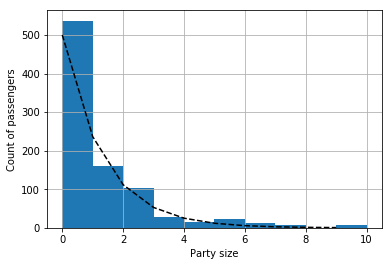

In [11]:
df['party_size'].hist()
plt.xlabel('Party size')
plt.ylabel('Count of passengers')

x = np.arange(df['party_size'].max())
plt.plot(x, 500*np.exp(-.75*x), 'k--')

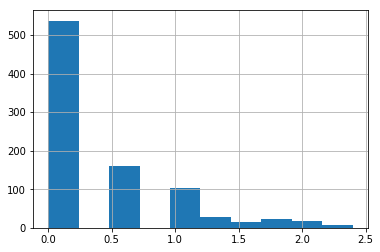

In [12]:
np.log(df['party_size']+1).hist()

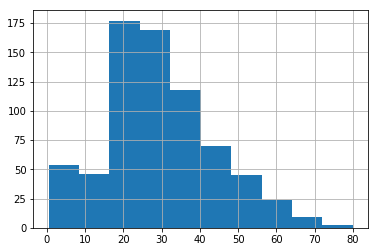

In [13]:
df['Age'].hist()

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
pd.qcut(df['Age'], [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]).value_counts().sort_index()

(13.999, 19.0]    93
(19.0, 22.0]      67
(22.0, 25.0]      70
(25.0, 28.0]      61
(28.0, 31.8]      66
(31.8, 36.0]      91
(36.0, 41.0]      53
(41.0, 50.0]      78
(50.0, 80.0]      64
Name: Age, dtype: int64

In [16]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [17]:
df.groupby(pd.cut(df['Age'], [0,5,18,25, 35,45,55,65,85]))['Survived'].mean()

Age
(0, 5]      0.704545
(5, 18]     0.410526
(18, 25]    0.333333
(25, 35]    0.423469
(35, 45]    0.394737
(45, 55]    0.412698
(55, 65]    0.343750
(65, 85]    0.125000
Name: Survived, dtype: float64

In [36]:
def extract_title(name):
    return name.split(', ')[1].split('. ')[0]
#.str.split(', ').apply(lambda s:s[1]).str.split('. ').apply(lambda s:s[0])

titled_women = df[df['Name'].str.contains('Miss|Ms|Mrs')]
womens_titles = titled_women['Name'].apply(extract_title)


In [41]:
titled_women.groupby(womens_titles)['Survived'].agg(['mean', 'count'])

,mean,count
Name,,
Lady,1.000000,1
Miss,0.697802,182
Mlle,1.000000,1
Mrs,0.792000,125
Ms,1.000000,1


In [42]:
titled_women[~womens_titles.isin(['Lady', 
                                  'Mlle', 
                                  'Ms'])].groupby([womens_titles, titled_women['Parch']>0])['Survived'].agg(['mean', 'count'])

mean  count
Name Parch                 
Miss False  0.737288    118
     True   0.625000     64
Mrs  False  0.855072     69
     True   0.714286     56

In [43]:
titled_women[~womens_titles.isin(['Lady', 
                                  'Mlle', 
                                  'Ms'])].groupby([womens_titles, titled_women['SibSp']>0])['Survived'].agg(['mean', 'count'])

mean  count
Name SibSp                 
Miss False  0.764228    123
     True   0.559322     59
Mrs  False  0.822222     45
     True   0.775000     80

In [22]:
titled_women[~womens_titles.isin(['Lady', 
                                  'mlle', 
                                  'Ms'])].groupby([womens_titles, titled_women['Pclass']])['Survived'].agg(['mean', 'count'])

mean  count
Name Pclass                 
Miss 1       0.956522     46
     2       0.941176     34
     3       0.500000    102
Mlle 1       1.000000      1
Mrs  1       0.976190     42
     2       0.902439     41
     3       0.500000     42

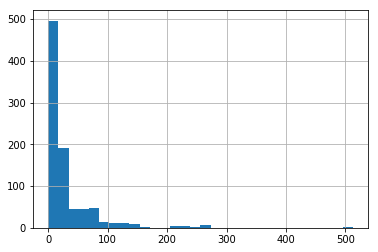

In [23]:
df['Fare'].hist(bins=30)

In [24]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
df['age_bin'] = pd.cut(df['Fare'], [0, 5, 18,25,35,45,55,85])

df['fare_class'] = df.apply(lambda row:row['Fare']>df[df['age_bin'] == row['age_bin']]['Fare'].median(), axis = 1)

In [26]:
df.groupby('age_bin')['Fare'].median()

age_bin
(0, 5]       4.50625
(5, 18]      8.05000
(18, 25]    21.00000
(25, 35]    27.72080
(35, 45]    39.40000
(45, 55]    52.00000
(55, 85]    71.28330
Name: Fare, dtype: float64

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,party_size,age_bin,fare_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(5, 18]",False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,"(55, 85]",False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(5, 18]",False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,"(45, 55]",True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,"(5, 18]",False


In [28]:
df.set_index(pd.cut(df['Age'], [0,5 ,18,25,35,45,55,85]))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,party_size,age_bin,fare_class
Age,,,,,,,,,,,,,,,
"(18, 25]",1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(5, 18]",False
"(35, 45]",2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,"(55, 85]",False
"(25, 35]",3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(5, 18]",False
"(25, 35]",4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,"(45, 55]",True
"(25, 35]",5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,"(5, 18]",False
NaN,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,"(5, 18]",True
"(45, 55]",7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,"(45, 55]",False
"(0, 5]",8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,"(18, 25]",True
"(25, 35]",9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,"(5, 18]",True
